In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
from matplotlib import pyplot as plt
import numpy as np

In [177]:
from chatreward.minigrid.complete import build_reward_funcs, build_text_subgoals
from chatreward.minigrid.env import create_env, Actions, COLOR_TO_IDX, RGBImgPartialObsWrapper
from chatreward.ppo import learn

In [209]:
quick_env = create_env()
quick_env.reset()
render = quick_env.render()

subgoals = build_text_subgoals(render)
print("\n".join(subgoals.choices[0].message.content.splitlines()))

reload please
- Be in front of the {keyroom_color} door.
- Toggle the {keyroom_color} door to open it.
- Enter the {keyroom_color} room.
- Pick up the {lockedroom_color} key.
- Exit the {keyroom_color} room.
- Be in front of the {lockedroom_color} door.
- Toggle the {lockedroom_color} door to open it.
- Enter the {lockedroom_color} room.
- Be in front of the {door_color} door.
- Toggle the {door_color} door to open it.
- Enter the {door_color} room.
- Move to the goal location.


In [246]:
num_suffixes = 1
suffixes = list(map(chr, range(65, 65+num_suffixes))) # ["A", "B", "C"]

reward_funcs = build_reward_funcs(subgoals, suffixes)

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 1/1 [02:57<00:00, 177.23s/it]

New reward function: 0A
import numpy as np

def reward(observation, action, lockedroom_color, keyroom_color, door_color):
    """
    This reward function encourages the agent to position itself in front of the door of the color specified by `keyroom_color`.
    The agent receives a higher reward when it is directly in front of the door of the correct color and the door is closed or locked.
    
    Parameters:
    - observation: a dictionary containing 'direction', 'image', and 'mission'.
    - action: the action taken by the agent, an integer from 0 to 6.
    - lockedroom_color: integer representing the color of the locked room.
    - keyroom_color: integer representing the color of the key room.
    - door_color: integer representing the color of the door to unlock.
    
    Returns:
    - A float reward value between 0 and 1, where 1 is the maximum reward when the agent is in front of the correct door.
    """
    # Extract the image from the observation
    image = observation['im

In [237]:
import numpy as np

def reward_demo(observation, action, lockedroom_color, keyroom_color, door_color):
    """
    This reward function encourages the agent to position itself in front of the door of the color specified by `keyroom_color`.
    The agent receives a higher reward when it is directly in front of the door of the correct color and the door is closed or locked.
    
    Parameters:
    - observation: a dictionary containing 'direction', 'image', and 'mission'.
    - action: the action taken by the agent, an integer from 0 to 6.
    - lockedroom_color: integer representing the color of the locked room.
    - keyroom_color: integer representing the color of the key room.
    - door_color: integer representing the color of the door to unlock.
    
    Returns:
    - A float reward value between 0 and 1, where 1 is the maximum reward when the agent is in front of the correct door.
    """
    # Extract the image from the observation
    image = observation['image']
    # Agent's position is at the bottom center of the image
    agent_x = image.shape[0] // 2
    agent_y = image.shape[1] - 1
    
    # Position right in front of the agent
    front_x = agent_x
    front_y = agent_y - 1
    
    # Check if the position in front of the agent is within bounds
    if front_y >= 0:
        front_object, front_color, front_state = image[front_x, front_y]
        
        # Check if the object in front is a door and has the color of the keyroom
        if front_object == 4 and front_color == keyroom_color:
            # Check if the door is either closed or locked
            if front_state in [1, 2]:
                return 1.0  # Maximum reward when in front of the correct door and it's not open
    
    # Penalize slightly for not being in front of the correct door
    return 0.0

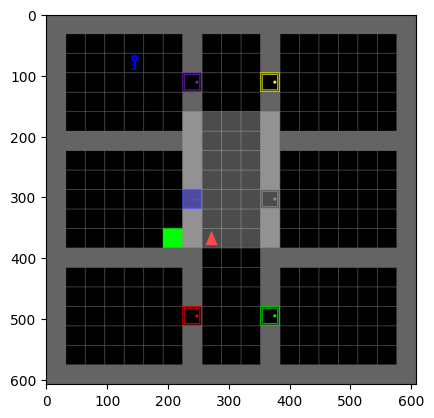

In [258]:
quick_env = create_env(rgb_support=False, farama_support=False)
obs, _ = quick_env.reset()

plt.imshow(quick_env.render())

In [259]:
lockedroom_color = COLOR_TO_IDX[obs["mission"].split(" ")[2]]
keyroom_color = COLOR_TO_IDX[obs["mission"].split(" ")[6]]
door_color = COLOR_TO_IDX[obs["mission"].split(" ")[10]]

print(obs['mission'])

get the blue key from the purple room, unlock the blue door and go to the goal


0.0

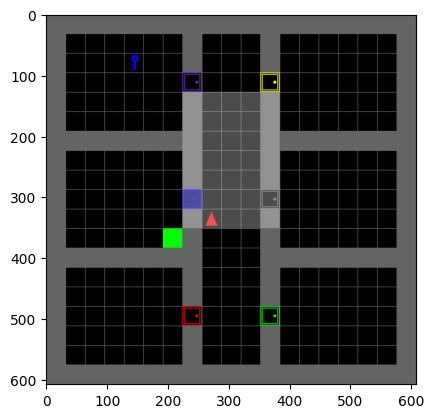

In [260]:
action = Actions.FORWARD
prev_obs = obs
obs, reward, done, _, info = quick_env.step(action)

plt.imshow(quick_env.render())

## Reward:
reward_funcs[0]['A'](prev_obs, action, lockedroom_color, keyroom_color, door_color)
# reward_demo(prev_obs, action, lockedroom_color, keyroom_color, door_color)

In [229]:
obs

{'image': array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [2, 5, 0],
         [1, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [2, 5, 0],
         [1, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [2, 5, 0],
         [1, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [4, 0, 1],
         [1, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [2, 5, 0],
         [1, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [2, 5, 0],
         [1, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [2, 5, 0],
         [2, 

In [261]:
env = create_env(reward_funcs)
learn(2e5, env, "minigrid_models/minigrid_custom/run_demo", "videos/run_demo")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/Users/lucg/.pyenv/versions/3.10.13/envs/6.8200/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(
/Users/lucg/.pyenv/versions/3.10.13/envs/6.8200/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.agent_pos to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.agent_pos` for environment variables or `env.get_wrapper_attr('agent_pos')` that will search the reminding wrappers.
  logger.warn(
/Users/lucg/.pyenv/versions/3.10.13/envs/6.8200/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.front_pos to get variables from other wrappers is deprecated and will be removed in v1.0, to 

switching functions from 0 to 1
switching functions from 1 to 2
switching functions from 2 to 3
switching functions from 0 to 1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 190      |
|    ep_rew_mean     | 10.7     |
| time/              |          |
|    fps             | 710      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
switching functions from 0 to 1
switching functions from 1 to 2
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 190          |
|    ep_rew_mean          | 8.32         |
| time/                   |              |
|    fps                  | 262          |
|    iterations           | 2            |
|    time_elapsed         | 15           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.00672381

/Users/lucg/.pyenv/versions/3.10.13/envs/6.8200/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /Users/lucg/Library/Mobile Documents/com~apple~CloudDocs/Content/Work/MIT/academics/semesters/2024s/6.8200/final project/language-reward-design/videos/run_demo folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /Users/lucg/Library/Mobile Documents/com~apple~CloudDocs/Content/Work/MIT/academics/semesters/2024s/6.8200/final project/language-reward-design/videos/run_demo/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/lucg/Library/Mobile Documents/com~apple~CloudDocs/Content/Work/MIT/academics/semesters/2024s/6.8200/final project/language-reward-design/videos/run_demo/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/lucg/Library/Mobile Documents/com~apple~CloudDocs/Content/Work/MIT/academics/semesters/2024s/6.8200/final project/language-reward-design/videos/run_demo/rl-video-episode-0.mp4


/Users/lucg/.pyenv/versions/3.10.13/envs/6.8200/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.agent_pos to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.agent_pos` for environment variables or `env.get_wrapper_attr('agent_pos')` that will search the reminding wrappers.
  logger.warn(
/Users/lucg/.pyenv/versions/3.10.13/envs/6.8200/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.front_pos to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.front_pos` for environment variables or `env.get_wrapper_attr('front_pos')` that will search the reminding wrappers.
  logger.warn(
/Users/lucg/.pyenv/versions/3.10.13/envs/6.8200/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.grid to get variables from other wrappers is deprecated and will be removed in v1.0, to get t

Moviepy - Building video /Users/lucg/Library/Mobile Documents/com~apple~CloudDocs/Content/Work/MIT/academics/semesters/2024s/6.8200/final project/language-reward-design/videos/run_demo/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/lucg/Library/Mobile Documents/com~apple~CloudDocs/Content/Work/MIT/academics/semesters/2024s/6.8200/final project/language-reward-design/videos/run_demo/rl-video-episode-0.mp4



/Users/lucg/.pyenv/versions/3.10.13/envs/6.8200/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.agent_pos to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.agent_pos` for environment variables or `env.get_wrapper_attr('agent_pos')` that will search the reminding wrappers.
  logger.warn(
/Users/lucg/.pyenv/versions/3.10.13/envs/6.8200/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.front_pos to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.front_pos` for environment variables or `env.get_wrapper_attr('front_pos')` that will search the reminding wrappers.
  logger.warn(
/Users/lucg/.pyenv/versions/3.10.13/envs/6.8200/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.grid to get variables from other wrappers is deprecated and will be removed in v1.0, to get t

Moviepy - Done !
Moviepy - video ready /Users/lucg/Library/Mobile Documents/com~apple~CloudDocs/Content/Work/MIT/academics/semesters/2024s/6.8200/final project/language-reward-design/videos/run_demo/rl-video-episode-0.mp4
switching functions from 0 to 1
switching functions from 1 to 2
